In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc

In [2]:
# Load data and add column names
name = 'AutoXYTest_20230428_142121'
headers = ['X (mm)', 'Y (mm)']
data = pd.read_csv('.\Results\%s.csv' %name, names=headers) #select your file
#start = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: (x != 0) and not x % 2)
start = data.iloc[::3, :]
#destination = pd.read_csv('.\Results\pre_20230113_145250.csv', nrows=1, names=headers) #select your file
destination = data.iloc[1::3, :]
#end = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: x % 2)
end = data.iloc[2::3, :]
moves = data[data.index % 3 != 1]

In [3]:
print(moves)

       X (mm)     Y (mm)
0   14.651031  11.085386
2   15.033524  12.352215
3   15.034019  12.352210
5   16.882464  11.656803
6   16.881736  11.657611
8   12.557041  11.369263
9   12.558008  11.370320
11  17.066272  11.570507
12  17.066412  11.571137
14  14.449780  11.159841
15  14.449543  11.161210
17  16.440723  11.778938
18  16.441521  11.780257
20  16.132417  12.581471
21  16.132533  12.581758
23  14.064891  10.557424
24  14.066201  10.558685
26  16.798156  10.436697
27  16.798204  10.436371
29  14.371627   9.614997
30  14.371712   9.615756
32  14.245536   9.666792
33  14.245359   9.666480
35  12.590476  12.305918
36  12.589839  12.305690
38  14.224192  11.388433
39  14.223863  11.388976
41  16.871122  11.542811
42  16.872046  11.543579
44  12.577962  11.503643
45  12.577617  11.502993
47  13.912887  11.829583
48  13.913005  11.829791
50  16.901406  10.846438
51  16.901625  10.846961
53  12.366639  10.261138
54  12.367354  10.260039
56  14.307570  10.342854
57  14.306624  10.342807


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


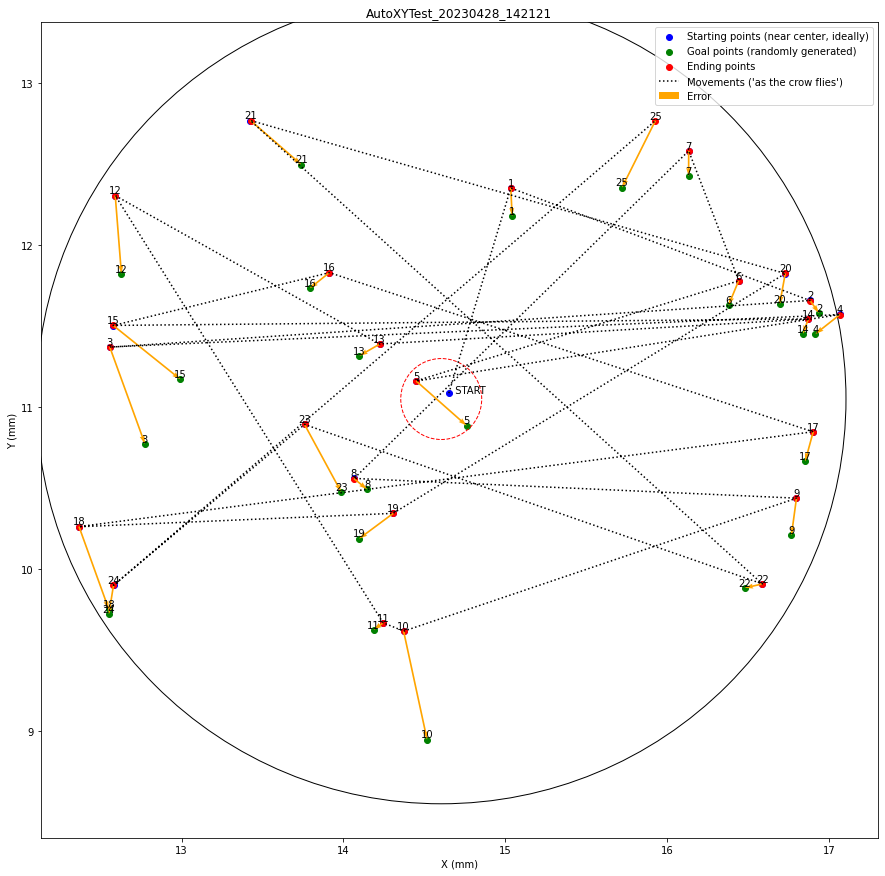

In [4]:
# Plot
steps = list(range(1,len(destination['X (mm)']) +1))
print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(start['X (mm)'], start['Y (mm)'],color='blue',label="Starting points (near center, ideally)")
plt.scatter(destination['X (mm)'], destination['Y (mm)'],c='green',label="Goal points (randomly generated)")
for (xi, yi, i) in zip(destination['X (mm)'], destination['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
plt.scatter(end['X (mm)'], end['Y (mm)'],color='red',label="Ending points")
for (xi, yi, i) in zip(end['X (mm)'], end['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

plt.text(data['X (mm)'][0],data['Y (mm)'][0],'  START',size = 10)
#plt.text(end['X (mm)'][-1:],end['Y (mm)'][-1:],'  END',size = 10)
plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements ('as the crow flies')" )

endx = end['X (mm)'].tolist()
endy = end['Y (mm)'].tolist()
destx = destination['X (mm)'].tolist()
desty = destination['Y (mm)'].tolist()

xdiffs = np.subtract(destx, endx)
xerror = list(xdiffs)

ydiffs = np.subtract(desty, endy)
yerror = list(ydiffs)


plt.quiver(end['X (mm)'], end['Y (mm)'], xerror, yerror, scale_units ='xy', scale = 1, width=.002,color='orange',label="Error")

#ab = AnchoredText("University of Michigan", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
#ab.set_zorder(0)
#ax.add_artist(ab)

plt.title(name)
plt.axis("equal")
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()